#¿Cómo dibujar mapas estáticos con Python?
Ya que gran parte de la información del INE hace referencia a territorios geográficos (España, CCAA, provincias o municipios), emplear mapas es una manera idónea de mostrar los datos. Así, en este cuaderno, explicamos cómo realizar mapas estáticos en Python.

A diferencia de los mapas interactivos - que en otro cuaderno se explica cómo crearlos -, los mapas estáticos no muestran información adicional al pasar el cursor por encima de ellos. Sin embargo, pueden resultar muy útiles a la hora de realizar presentaciones en Power Point o plataformas similares, ya que nos los podremos descargar en formato *.png* o *.jpg* e insertarlos fácilmente como imágenes.

###Librerías a utilizar:

*Geopandas* es la librería de Python que nos permite realizar mapas estáticos.

Su uso no es complicado, ya que maneja los *dataframes* al igual que hace *Pandas*.

In [ ]:
import pandas as pd
!pip install geopandas
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

###Archivos *shapefile* y la posibilidad de acceder a ellos a través de *Google Drive*
Una de las formas más habituales de utilizar información geográfica es mediante archivos *shapefile* (*.shp*). Este tipo de archivos es el formato estrella en Sistemas de Información Geográfica (SIG) como ArcGIS o QGIS.

Podemos leer este tipo de archivos con *Geopandas*, de la siguiente forma:
```python
mapa = gpd.read_file("mapa_provincias.shp")
```

Sin embargo, si leemos solamente un archivo *.shp* se producirá el siguiente error:

```python
CPLE_OpenFailedError: Unable to open mapa_provincias.shx or mapa_provincias.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.
```
Dicho error se debe a que al llamar a un archivo *.shp*, en realidad, Python no solo está llamando a dicho archivo, sino a todos los archivos que estaban dentro de la misma carpeta *.zip* que descargamos (archivos *.shx*, *.dbf*, *.sbn*, etc). Entonces, para evitar este error, debemos tener todos esos archivos cargados en *Colab*, pese a solo llamar directamente al archivo *.shp*. Existen dos formas de tener todos los archivos cargados en *Colab*:
* **Forma 1**: Subir los archivos directamente a *Colab*. Se deben seguir los siguientes pasos:
  1. Clicamos en el icono de la derecha de la pantalla que tiene forma de carpeta y se abre un desplegable a su derecha.
  2. Clicamos en el icono que nos muestra una carpeta con una flecha hacia arriba en su interior.
  3. Se abrirá una carpeta para que busquemos el archivo. Una vez seleccionado, le damos a "Abrir". (Como podemos seleccionar varios archivos a la vez, se recomienda seleccionar todos los que estaban dentro de la carpeta *.zip*, y luego darle a "Abrir").
  4. Esperamos a que se cargue y, una vez cargado, ya podemos usar la función de Python apropiada para leer dicho archivo.

  (Esta operación de carga hay que realizarla cada vez que se abra el cuaderno).
* **Forma 2**: conectar *Colab* con nuestra cuenta de *Google Drive*, y extraer la información directamente desde dicha cuenta. Se deben seguir los siguientes pasos:
  1. Tener una cuenta en *Google Drive*.
  2. Subir la carpeta descomprimida con los archivos del mapa (*.shp* y demás) a la cuenta de *Drive*.
  3. Ejecutar las siguientes líneas de código (también podemos dar al icono de la carpeta con el símbolo de *Drive* en su interior, que se encuentra a la derecha del icono que nos muestra una carpeta con una flecha hacia arriba en su interior - ver **Forma 1**).
  ```python
  from google.colab import drive
  drive.mount('/content/gdrive')
  ```
  4. Al ejecutar las líneas anteriores, tendremos que dar permisos a *Colab* para que conecte con nuestra cuenta de *Drive*. Dichos permisos deberán darse cada vez que abramos el cuaderno y ejecutemos está función, es decir, no son permisos que duren para siempre.
  5. Hecho lo anterior, todos los archivos que tuviésemos en *Drive* estarán disponibles en *Colab*. Al clicar en el icono de la derecha de la pantallla que tiene forma de carpeta, nos aparecerá una carpeta llamada *gdrive* que contiene todas las carpetas o archivos que tuviésemos en *Drive*.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Una vez cargados todos los archivos necesarios en *Colab*, ya se podrá utilizar la función de lectura de *Geopandas* sin problema. Para ello, debemos seguir los siguientes pasos:
* Si se ha utilizado la **Forma 1** para subir los archivos, simplemente debemos poner entre comillas el nombre del archivo. Por ejemplo:
```python
mapa = gpd.read_file("mapa_provincias.shp")
```
* Si se ha utilizado la **Forma 2**, el procedimiento es un poco más largo:
  1. Buscamos el archivo *.shp* cargado en *Colab*.
  2. Una vez localizado en su correspondiente carpeta, le damos a los tres puntitos que nos aparecen al poner el cursor encima del archivo.
  3. Seleccionamos la opción "Copiar ruta".
  4. Copiamos dicha ruta dentro de la función de *Geopandas*.
  
  Por ejemplo:
  ```python
  mapa = gpd.read_file("/content/gdrive/MyDrive/Mapa/mapa_provincias.shp")
  ```

Como en este cuaderno nos hemos conectado a *Drive*, debemos seguir los pasos de la segunda opción. 


Las capas *shapefile* que vamos a utilizar las vamos a descargar de la página web del Instituto Geográfico Nacional: http://centrodedescargas.cnig.es/CentroDescargas/buscar.do?filtro.codFamilia=LILIM&filtro.codCA=11#

Nos descargaremos una carpeta *.zip* que, a su vez, contendrá otras carpetas con la información de los límites geográficos de la España peninsular, Islas Baleares, Ceuta y Melilla (carpeta *SHP_ETRS89*), y de las Islas Canarias (carpeta *SHP_WGS84*). Asimismo, dentro de cada una de esas dos carpetas, tendremos otras con los recintos autonómicos, provinciales y municipales. Utilizaremos las capas de provincias para nuestro ejemplo.

Como el archivo *.shp* para las Islas Canarias es distinto al del resto de España, debemos leer ambos archivos por separado, para, posteriormente, concatenarlos (es decir, juntar ambas tablas una debajo de la otra):


In [ ]:
Canarias = gpd.read_file("/content/gdrive/MyDrive/recintos_provinciales_inspire_canarias_wgs84/recintos_provinciales_inspire_canarias_wgs84.shp")
Canarias

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
0,ES.IGN.BDDAE.34053800000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34053800000,Santa Cruz de Tenerife,ES7,ES70,None,"MULTIPOLYGON (((-17.96450 27.68740, -17.96445 ..."
1,ES.IGN.BDDAE.34053500000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34053500000,Las Palmas,ES7,ES70,None,"MULTIPOLYGON (((-15.69643 27.77113, -15.69653 ..."


In [ ]:
Resto_Espanna = gpd.read_file("/content/gdrive/MyDrive/recintos_provinciales_inspire_peninbal_etrs89/recintos_provinciales_inspire_peninbal_etrs89.shp")
Resto_Espanna.head()

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
0,ES.IGN.BDDAE.34104600000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34104600000,València/Valencia,ES5,ES52,None,"MULTIPOLYGON (((-1.20715 40.00183, -1.21662 40..."
1,ES.IGN.BDDAE.34084500000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34084500000,Toledo,ES4,ES42,None,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
2,ES.IGN.BDDAE.34024400000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34024400000,Teruel,ES2,ES24,None,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
3,ES.IGN.BDDAE.34094300000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34094300000,Tarragona,ES5,ES51,None,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
4,ES.IGN.BDDAE.34074200000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34074200000,Soria,ES4,ES41,None,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."


Vemos que el *dataframe* (su formato, visualización) es idéntico a cualquier otro de *Pandas*, salvo por una excepción: la columna *geometry*. En esta columna tenemos las coordenadas geográficas que nos permiten dibujar el mapa.

Antes de dibujar el mapa, debemos unir ambos *dataframes*, concatenando uno debajo del otro:

In [ ]:
mapa = gpd.GeoDataFrame(pd.concat([Resto_Espanna, Canarias]))

Finalmente, añadimos una columna llamada *Codigo* extrayendo los dígitos quinto y sexto de la variable *NATCODE*. Esta nueva columna nos será útil más adelante.

In [ ]:
mapa["Codigo"] = mapa["NATCODE"].str[4:6]
mapa[["NAMEUNIT", "NATCODE", "Codigo"]].head()

,NAMEUNIT,NATCODE,Codigo
0,València/Valencia,34104600000,46
1,Toledo,34084500000,45
2,Teruel,34024400000,44
3,Tarragona,34094300000,43
4,Soria,34074200000,42


###Dibujamos el mapa
Hecho lo anterior, ya podemos representar el mapa. Eso sí, todavía será un mapa sin ningún tipo de información:

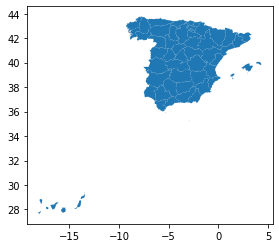

In [ ]:
mapa.plot();

### Mejoramos el mapa y mostramos información estadística: mapa de cloropletas
Como ejemplo, vamos a mostrar la tasa de paro provincias.

Para ello, primero debemos cargar el archivo con esa información. La tasa de paro por provincias la hemos obtenido de la siguiente pestaña del INE (la información se refiere al primer trimestre de 2021):
https://www.ine.es/jaxiT3/Datos.htm?t=3996

Nos descargamos la información en un *.csv* separado por punto y coma. Lo cargamos en *Colab*, por ejemplo, haciendo uso de la **Forma 1**, y leemos el archivo (antes de subirlo le hemos cambiado el nombre a *Tasa_Paro_Provincias* para facilitar seguir el cuaderno):

In [ ]:
datos_parados = pd.read_csv("Tasa_Paro_Provincias.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")
#Las opciones engine = "python" y encoding = "latin-1" las utilizamos para evitar un problema relacionado con la codificación UTF-8
datos_parados = datos_parados.rename(columns={"Total": "Tasa_Paro"}) # Cambiamos el nombre de la columna "Total" a "Tasa_Paro"
datos_parados.head()

,Sexo,Provincias,Tasas,Periodo,Tasa_Paro
0,Ambos sexos,02 Albacete,Tasa de paro de la población,2021T1,19.77
1,Ambos sexos,03 Alicante/Alacant,Tasa de paro de la población,2021T1,19.17
2,Ambos sexos,04 Almería,Tasa de paro de la población,2021T1,17.14
3,Ambos sexos,01 Araba/Álava,Tasa de paro de la población,2021T1,11.31
4,Ambos sexos,33 Asturias,Tasa de paro de la población,2021T1,14.09


Extraemos en un nueva columna llamada *Codigo* el código de provincia de la columna *Provincias*, y solo nos quedaremos con dicha columna *Codigo* y la columna de la tasa de paro:

In [ ]:
datos_parados["Codigo"] = datos_parados["Provincias"].str[:2]
datos_parados = datos_parados[["Codigo", "Provincias", "Tasa_Paro"]]

Hacemos la unión de tablas con el *dataframe* de la capa geográfica. Las tablas se fusionarán en base a la variable *Codigo*.

In [ ]:
mapa = pd.merge(mapa, datos_parados)
mapa = mapa[["NAMEUNIT", "Codigo", "Tasa_Paro", "geometry"]] #Nos quedamos con las columnas más relevantes
mapa = mapa.rename(columns={"NAMEUNIT":"Provincia"}) #Renombramos la variable NAMEUNIT con el nombre "Provincia"
mapa.head()

,Provincia,Codigo,Tasa_Paro,geometry
0,València/Valencia,46,14.75,"MULTIPOLYGON (((-1.20715 40.00183, -1.21662 40..."
1,Toledo,45,16.77,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
2,Teruel,44,10.60,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
3,Tarragona,43,15.51,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
4,Soria,42,9.73,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."


Volvemos a dibujar el mapa, pero ahora indicando, mediante una escala de colores (mapa de cloropletas), la tasa de paro de cada provincia.

Las últimas tres líneas de código nos permitirán descargarnos el mapa creado en formato *.png*.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

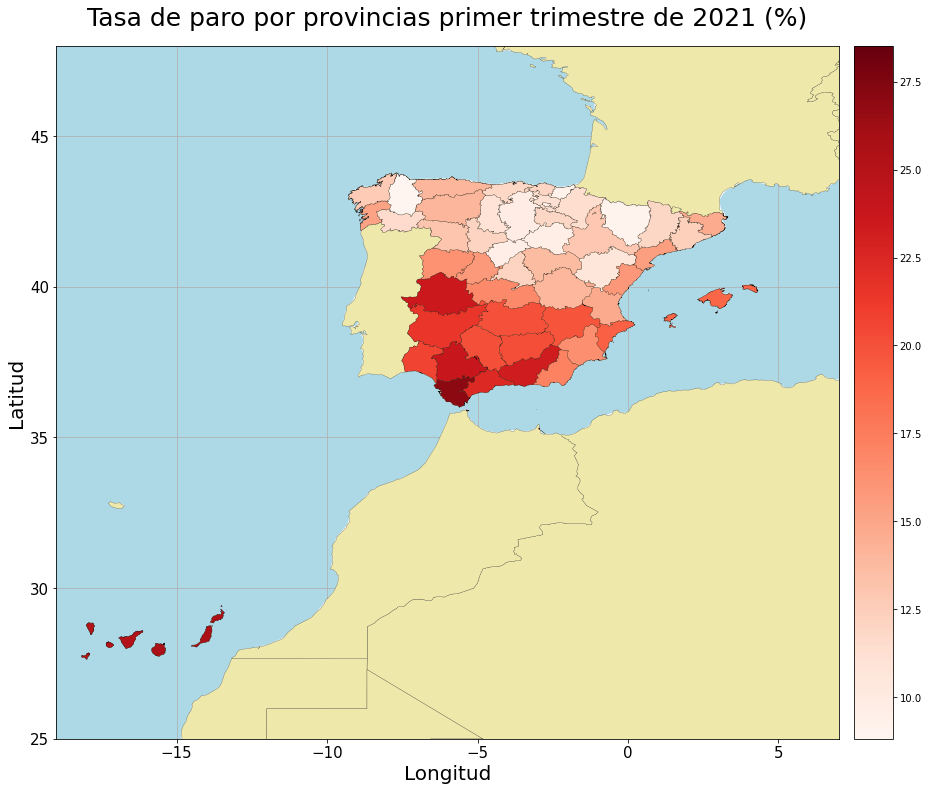

In [ ]:
#Creamos la figura y establecemos su tamaño:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
 
#Establecemos las coordenadas geográficas que queremos representar (es decir, de qué coordenada a qué coordenada queremos mostrar). Primero ponemos las coordenadas de longitud y luego de latitud.
ax.axis([-19, 7, 25, 48]) 
 
#Título y ejes:
ax.set_title('Tasa de paro por provincias primer trimestre de 2021 (%)', 
             pad = 20, #Eleva el título, separándolo del contorno de la figura
             fontdict={'fontsize':25}) 
ax.set_xlabel('Longitud', fontsize=20)
plt.xticks(fontsize=15)
ax.set_ylabel('Latitud', fontsize=20)
plt.yticks(fontsize=15)
plt.grid(True, zorder=0)


#Añadimos la leyenda separada del mapa:
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",
                         size="5%",
                         pad=0.2) #Para separar la leyenda un poco del mapa

#Dibujamos nuestro mapa de provincias:
mapa.plot(ax=ax,
          column='Tasa_Paro',
          cmap='Reds',
          edgecolor="black",
          linewidth=0.2,
          legend=True,
          cax=cax,
          zorder=5); #Cuanto menor sea este número, más abajo estará la capa. Fijando este número en 5, y las otras dos capas en núumeros menores, nos aseguramos de que este capa se vea por encima de las otras.

#Cargamos dos capas (uno de mares y oceanos, y otro de los países del mundo) para complementar nuestro mapa:
#La capa de océanos la hemos obtenido del siguiente enlace: https://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-ocean/
mapa_oceanos = gpd.read_file("/content/gdrive/MyDrive/Océanos/ne_50m_ocean.shp")
mapa_oceanos.plot(ax=ax,
                 color="lightblue",
                 zorder=0);
#La capa de países la hemos obtenido del siguiente enlace: https://hub.arcgis.com/datasets/ad61dcd7dd244d4096c22a49cc97011f/about 
mapa_paises = gpd.read_file("/content/gdrive/MyDrive/Mapamundi/Mapa_paises_mundo.shp")
mapa_paises.plot(ax=ax,
                 color="palegoldenrod",
                 edgecolor="black",
                 linewidth=0.2,
                 zorder=2);

#Nos descargamos el mapa en formato .png
plt.savefig("Mapa_Tasa_Paro_Provincias_Geopandas.png")
from google.colab import files
files.download("Mapa_Tasa_Paro_Provincias_Geopandas.png")     